In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Set up graphs
matplotlib.rcParams.update({'font.size': 11})

In [3]:
#Define the autocollimator zero position in pixels and the autocollimator calibration factor
zero_x = 848.54
zero_y = 540.77
calibration = 0.22193485237391664

In [4]:
#Import data and calculate the measured angles
df = pd.read_csv(r'../Data/processed_translation_stage_characterisation_data_20210909_165131.txt', delimiter = ',', skipinitialspace = True, skiprows = 7)
df.dropna(inplace = True)
df = df.astype('float64')
df.reset_index(drop = True, inplace = True)
df['Yaw measured (arcsec)'] = (df['Peak x position (px)'] - zero_x) / calibration
df['Pitch measured (arcsec)'] = (df['Peak y position (px)'] - zero_y) / calibration

In [5]:
#Calculate the angular deviation of the linear translation stage relative to the zero stage position
yaw_measured = df['Yaw measured (arcsec)'].copy().values
pitch_measured = df['Pitch measured (arcsec)'].copy().values
delta_yaw = np.zeros(np.shape(yaw_measured)[0])
delta_pitch = np.zeros(np.shape(pitch_measured)[0])
for i in range(3):
    delta_yaw[6*i:6*i+6] = yaw_measured[6*i:6*i+6] - yaw_measured[6*i]
    delta_pitch[6*i:6*i+6] = pitch_measured[6*i:6*i+6] - pitch_measured[6*i]
df.insert(6, 'Yaw deviation (arcsec)', delta_yaw)
df.insert(7, 'Pitch deviation (arcsec)', delta_pitch)
df

Translation stage z position (mm)  Peak x position (px)  \
0                                 0.0            977.048709   
1                                 5.0            974.850010   
2                                10.0            972.822544   
3                                15.0            970.828953   
4                                20.0            969.950183   
5                                25.0            968.948826   
6                                 0.0            977.450275   
7                                 5.0            975.199234   
8                                10.0            973.027242   
9                                15.0            970.968280   
10                               20.0            969.913984   
11                               25.0            969.054710   
12                                0.0            977.500067   
13                                5.0            975.251590   
14                               10.0            972.960779   
15                               15.0            970.921443   
16                               20.0            969.775735   
17                               25.0            969.013037   

    Peak y position (px)  Maximum pixel value  Yaw measured (arcsec)  \
0             609.223625                166.0             579.037981   
1             609.605293                166.0             569.131024   
2             610.200789                186.0             559.995613   
3             611.090903                167.0             551.012840   
4             612.877933                183.0             547.053255   
5             615.695844                186.0             542.541312   
6             609.333740                167.0             580.847367   
7             609.665022                168.0             570.704569   
8             610.265932                190.0             560.917950   
9             611.294511                172.0             551.640624   
10            612.939276                184.0             546.890145   
11            615.668820                186.0             543.018409   
12            609.361473                164.0             581.071721   
13            609.556989                168.0             570.940477   
14            610.129544                190.0             560.618476   
15            611.101026                169.0             551.429583   
16            612.766787                184.0             546.267220   
17            615.443203                184.0             542.830634   

    Pitch measured (arcsec)  Yaw deviation (arcsec)  Pitch deviation (arcsec)  
0                308.440176                0.000000                  0.000000  
1                310.159905               -9.906957                  1.719729  
2                312.843108              -19.042367                  4.402932  
3                316.853808              -28.025140                  8.413633  
4                324.905857              -31.984726                 16.465681  
5                337.602873              -36.496669                 29.162697  
6                308.936334                0.000000                  0.000000  
7                310.429033              -10.142799                  1.492699  
8                313.136633              -19.929417                  4.200298  
9                317.771231              -29.206743                  8.834897  
10               325.182255              -33.957222                 16.245920  
11               337.481108              -37.828959                 28.544774  
12               309.061297                0.000000                  0.000000  
13               309.942256              -10.131244                  0.880959  
14               312.522089              -20.453245                  3.460792  
15               316.899422              -29.642138                  7.838124  
16               324.405051              -34.804501                 15.343753

In [6]:
#Average results between repeated measurements based on the stage position
df_mean = df.groupby(['Translation stage z position (mm)'], as_index = False).mean()
df_mean

Translation stage z position (mm)  Peak x position (px)  \
0                                0.0            977.333017   
1                                5.0            975.100278   
2                               10.0            972.936855   
3                               15.0            970.906226   
4                               20.0            969.879967   
5                               25.0            969.005524   

   Peak y position (px)  Maximum pixel value  Yaw measured (arcsec)  \
0            609.306279           165.666667             580.319023   
1            609.609101           167.333333             570.258690   
2            610.198755           188.666667             560.510680   
3            611.162147           169.333333             551.361016   
4            612.861332           183.666667             546.736873   
5            615.602622           185.333333             542.796785   

   Pitch measured (arcsec)  Yaw deviation (arcsec)  Pitch deviation (arcsec)  
0               308.812603                0.000000                  0.000000  
1               310.177065              -10.060333                  1.364462  
2               312.833943              -19.808343                  4.021341  
3               317.174820              -28.958007                  8.362218  
4               324.831054              -33.582150                 16.018452  
5               337.182834              -37.522238                 28.370231

In [7]:
#Calculate the standard deviation of the measured angles using the difference between the measured points and the average of the measurements at that stage position
yaw_measured = df['Yaw measured (arcsec)'].copy().values
pitch_measured = df['Pitch measured (arcsec)'].copy().values
yaw_measured_mean = df_mean['Yaw measured (arcsec)'].copy().values
pitch_measured_mean = df_mean['Pitch measured (arcsec)'].copy().values
yaw_measured_mean = np.tile(yaw_measured_mean, 3)
pitch_measured_mean = np.tile(pitch_measured_mean, 3)
yaw_measured_error = yaw_measured - yaw_measured_mean
pitch_measured_error = pitch_measured - pitch_measured_mean
yaw_measured_std = np.std(yaw_measured_error, ddof = 1)
pitch_measured_std = np.std(pitch_measured_error, ddof = 1)
print('Yaw measurement standard deviation: {:.2g}\n'
      'Pitch measurement standard deviation: {:.2g}'
      .format(yaw_measured_std, pitch_measured_std))

Yaw measurement standard deviation: 0.57
Pitch measurement standard deviation: 0.36


In [8]:
#Calculate the error on the angular deviation using the standard deviations found in the previous cell and standard error propagation formulas
yaw_deviation_std = np.sqrt(2 * yaw_measured_std**2)
pitch_deviation_std = np.sqrt(2 * pitch_measured_std**2)

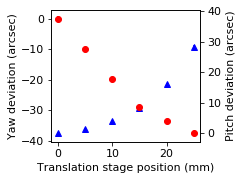

In [9]:
#Plot the average angular deviation with error bars indicating the errors found in the previous cell
fig, ax = plt.subplots(1, 1, figsize = (3.50, 2.63))
ax2 = ax.twinx()

ax.errorbar(
    df_mean['Translation stage z position (mm)'],
    df_mean['Yaw deviation (arcsec)'],
    yerr = yaw_deviation_std,
    color = 'r',
    fmt = 'o'
)
ax2.errorbar(
    df_mean['Translation stage z position (mm)'],
    df_mean['Pitch deviation (arcsec)'],
    yerr = pitch_deviation_std,
    color = 'b',
    fmt = '^'
)

ax.set_ylabel('Yaw deviation (arcsec)')
ax2.set_ylabel('Pitch deviation (arcsec)')
ax.set_xlabel('Translation stage position (mm)')

ymin1, ymax1 = ax.get_ylim()
ymin2, ymax2 = ax2.get_ylim()
ymin = np.max([ymax1, np.abs(ymin2)])
ymax = np.max([np.abs(ymin1), ymax2])
ax.set_ylim(-ymax, ymin)
ax2.set_ylim(-ymin, ymax)

ax.set_zorder(1)
ax.patch.set_visible(False)

plt.tight_layout()
plt.savefig('translation_stage.pdf')
plt.show()

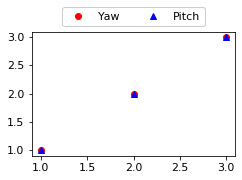

In [10]:
#Generate legend
fig, ax = plt.subplots(1, 1, figsize = (3.50, 2.63))

temp_x = np.array([1, 2, 3])
temp_y = np.array([1, 2, 3])

ax.plot(temp_x, temp_y, marker = 'o', linestyle = '', color = 'r', label = 'Yaw')
ax.plot(temp_x, temp_y, marker = '^', linestyle = '', color = 'b', label = 'Pitch')

ax.legend(loc = 'lower center', bbox_to_anchor = (0.5, 1), ncol = 2, framealpha = 1)

plt.tight_layout()
plt.savefig('translation_stage_legend.pdf')
plt.show()

In [11]:
#Calculate the total angular deviation of the linear tranlation stage between opposite ends of its movement range and the error on this result using standard error propagation formulas
yaw_deviation = df['Yaw deviation (arcsec)'].copy().values
pitch_deviation = df['Pitch deviation (arcsec)'].copy().values
total_angular_deviation = np.sqrt(np.max(np.abs(yaw_deviation))**2 + np.max(np.abs(pitch_deviation))**2)
yaw_deviation_squared_std = 2 * np.max(np.abs(yaw_deviation)) * yaw_deviation_std
pitch_deviation_squared_std = 2 * np.max(np.abs(pitch_deviation)) * pitch_deviation_std
sum_squared_deviation_std = np.sqrt(yaw_deviation_squared_std**2 + pitch_deviation_squared_std**2)
total_angular_deviation_std = 0.5 * sum_squared_deviation_std / total_angular_deviation
print('The angular deviation of the linear stage over its range of travel is: {:.2f} +- {:.2g} arcsec'
      .format(total_angular_deviation, total_angular_deviation_std))

The angular deviation of the linear stage over its range of travel is: 48.09 +- 0.71 arcsec
